# Solving UD-MIS problem using Classical Brute Force

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from qutip import *

In [2]:
def get_edges(graph):
    Nv = len((graph))
    edges = []
    for i in range(0, Nv):
        xi, yi = graph[i]
        for j in range(i+1,Nv):
            xj, yj = graph[j]
            dij = np.sqrt((xi - xj)**2. + (yi - yj)**2.)
            if dij <= 1.0:
                edges.append([i,j])
    return edges

In [3]:
def cost_UD_MIS(conf, graph):
    #From graph calculate edges
    edges=get_edges(graph)
    N=len(graph)
    u=1.35
    for n in a:            #For all configurations
        cost=-np.sum(conf) #First term of Hamiltonian 
        for ed in edges:   #For each configuration
            cost=cost+ u* n[ed[0]]*n[ed[1]]
    return cost

In [4]:
# Function for solving the UD-MIS by brute force 
# (generate all configurations and evaluate the cost)

def bforce_UD_MIS(graph):
    #From graph calculate edges
    index=[]
    edges=get_edges(graph)
    N=len(graph)
    #generate all possible configuration
    a = list(product([0, 1], repeat=N))
    best_cost = 1e10     #initial value
    u=1.35
    for n in a:           #For all configurations
        cost=-np.sum(n)   #First term of Hamiltonian 
        for ed in edges:   #For each configuration
            cost=cost+ u* n[ed[0]]*n[ed[1]]
        index.append(cost)
        if cost < best_cost:
            best_conf = n
            best_cost = cost

    for  ind in np.argsort(index):       
        print('Configuration: ', a[ind], 'Cost: ','{0:6.2f}'.format(index[ind])) #show solutions
            
    print('*******************************')
    print('Best Configuration: ', best_conf)
    print('Best Cost: ','{0:6.2f}'.format(best_cost))
    return best_conf, best_cost

### Solving  Problem 1-2 using Brute Force

In [5]:
# Data
graph = np.array([[0.3461717838632017, 1.4984640297338632], 
         [0.6316400411846113, 2.5754677320579895], 
         [1.3906262250927481, 2.164978861396621], 
         [0.66436005100802, 0.6717919819739032], 
         [0.8663329771713457, 3.3876341010035995], 
         [1.1643107343501296, 1.0823066243402013]])

edges=get_edges(graph)

In [6]:
# Calculating Brute Force solution
bforce_UD_MIS(graph)

Configuration:  (1, 0, 1, 0, 1, 0) Cost:   -3.00
Configuration:  (0, 0, 1, 1, 1, 0) Cost:   -3.00
Configuration:  (0, 0, 1, 0, 1, 1) Cost:   -3.00
Configuration:  (1, 0, 1, 0, 1, 1) Cost:   -2.65
Configuration:  (1, 0, 1, 1, 1, 0) Cost:   -2.65
Configuration:  (0, 0, 1, 1, 1, 1) Cost:   -2.65
Configuration:  (0, 1, 0, 0, 0, 1) Cost:   -2.00
Configuration:  (1, 0, 1, 0, 0, 0) Cost:   -2.00
Configuration:  (0, 1, 0, 1, 0, 0) Cost:   -2.00
Configuration:  (1, 1, 0, 0, 0, 0) Cost:   -2.00
Configuration:  (0, 0, 1, 1, 0, 0) Cost:   -2.00
Configuration:  (1, 0, 0, 0, 1, 0) Cost:   -2.00
Configuration:  (0, 0, 1, 0, 0, 1) Cost:   -2.00
Configuration:  (0, 0, 0, 1, 1, 0) Cost:   -2.00
Configuration:  (0, 0, 0, 0, 1, 1) Cost:   -2.00
Configuration:  (0, 0, 1, 0, 1, 0) Cost:   -2.00
Configuration:  (1, 0, 0, 1, 1, 0) Cost:   -1.65
Configuration:  (1, 0, 1, 0, 0, 1) Cost:   -1.65
Configuration:  (0, 1, 1, 1, 0, 0) Cost:   -1.65
Configuration:  (1, 1, 0, 1, 0, 0) Cost:   -1.65
Configuration:  (0, 

((0, 0, 1, 0, 1, 1), -3.0)

In [7]:
bf_sol=np.array([[1, 0, 1, 0, 1, 0],
                [0, 0, 1, 1, 1, 0],
                [0, 0, 1, 0, 1, 1]])

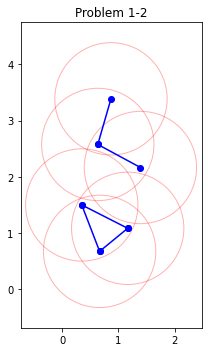

In [8]:
#Plot of the problem
fig, ax = plt.subplots(figsize=(3,5), tight_layout=True)
ax.set_title("Problem 1-2")
for i in range(len(graph)):
    ax.add_patch(plt.Circle(graph[i], 1., color='r', alpha=0.3, fill=False))
for edg in edges:
    x1, y1 = [graph[edg[0]][0], graph[edg[1]][0]], [graph[edg[0]][1], graph[edg[1]][1]]
    ax.plot(x1, y1, marker = 'o',color='b')
ax.set_aspect('equal', adjustable='datalim')
ax.plot()
plt.show()
fig.savefig('01-problem1_2.png', dpi=500)

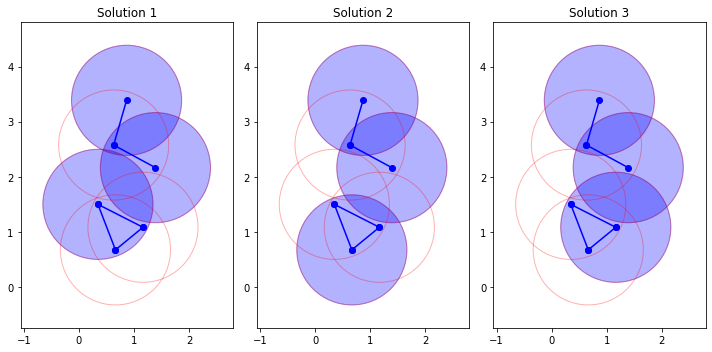

In [9]:
fig = plt.figure(figsize=(10, 5), tight_layout=True)

for k in range(len(bf_sol)):
    ax = fig.add_subplot(1, 3, k + 1)
    ax.set_title("Solution {}".format(k+1))
    for j in range(len(bf_sol[0])):
        if bf_sol[k][j]==1:ax.add_patch(plt.Circle(graph[j], 1., color='b', alpha=0.3))
    

    for i in range(len(graph)):
        ax.add_patch(plt.Circle(graph[i], 1., color='r', alpha=0.3, fill=False))    
        
    for edg in edges:
        x1, y1 = [graph[edg[0]][0], graph[edg[1]][0]], [graph[edg[0]][1], graph[edg[1]][1]]
        ax.plot(x1, y1, marker = 'o',color='b')
    ax.set_aspect('equal', adjustable='datalim')
    #ax.plot()
plt.show()
fig.savefig('solutions_1_2.png', dpi=500)

### Solving  Bruce's Wayne Problem using Brute Force

In [10]:
# Data
graph_gotham=np.array([[1.19, 4.25],
                       [2.71, 3.48],
                       [1.19, 3.51],
                       [2., 3.38],
                       [1.12, 2.86],
                       [1.70, 2.42],
                       [2.36, 2.54],
                       [1.52, 1.48],
                       [2.15, 1.54],
                       [2.14, 1.87],
                       [1.72, 0.86],
                       [2.29, 0.87]])

edg_gothan=get_edges(graph_gotham)

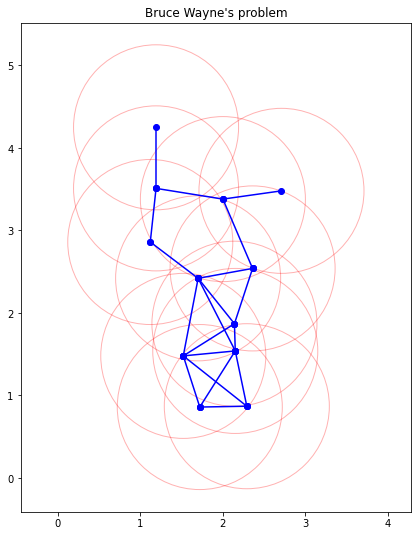

In [11]:
fig, ax = plt.subplots( figsize=(7,9))

for i in range(len(graph_gotham)):
    ax.add_patch(plt.Circle(graph_gotham[i], 1., color='r', alpha=0.3, fill=False))

for edg in edg_gothan:
    x1, y1 = [graph_gotham[edg[0]][0], graph_gotham[edg[1]][0]], [graph_gotham[edg[0]][1], graph_gotham[edg[1]][1]]
    ax.plot(x1, y1, marker = 'o',color='b')

plt.title("Bruce Wayne's problem")    
ax.set_aspect('equal', adjustable='datalim')
ax.plot()
plt.show()
fig.savefig('wayne_problem.png', dpi=500)

In [12]:
# Calculating Brute Force solution
bforce_UD_MIS(graph_gotham)

Configuration:  (1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0) Cost:   -5.00
Configuration:  (1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0) Cost:   -5.00
Configuration:  (1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0) Cost:   -5.00
Configuration:  (1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1) Cost:   -5.00
Configuration:  (1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1) Cost:   -5.00
Configuration:  (1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1) Cost:   -5.00
Configuration:  (1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0) Cost:   -5.00
Configuration:  (1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0) Cost:   -5.00
Configuration:  (1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0) Cost:   -4.65
Configuration:  (1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1) Cost:   -4.65
Configuration:  (1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0) Cost:   -4.65
Configuration:  (1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1) Cost:   -4.65
Configuration:  (1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0) Cost:   -4.65
Configuration:  (1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1) Cost:   -4.65
Configuration:  (1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0) Cost:   -

Configuration:  (1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1) Cost:   -1.60
Configuration:  (1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1) Cost:   -1.60
Configuration:  (0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1) Cost:   -1.60
Configuration:  (1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1) Cost:   -1.60
Configuration:  (1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1) Cost:   -1.60
Configuration:  (1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1) Cost:   -1.60
Configuration:  (1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0) Cost:   -1.60
Configuration:  (1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1) Cost:   -1.60
Configuration:  (1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1) Cost:   -1.60
Configuration:  (1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1) Cost:   -1.60
Configuration:  (1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0) Cost:   -1.60
Configuration:  (1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1) Cost:   -1.60
Configuration:  (1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0) Cost:   -1.60
Configuration:  (1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1) Cost:   -1.60
Configuration:  (1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1) Cost:   -

Configuration:  (1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0) Cost:    0.75
Configuration:  (1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1) Cost:    0.75
Configuration:  (0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0) Cost:    0.75
Configuration:  (1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0) Cost:    0.75
Configuration:  (1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1) Cost:    0.75
Configuration:  (0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0) Cost:    0.75
Configuration:  (0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1) Cost:    0.75
Configuration:  (0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0) Cost:    0.75
Configuration:  (0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0) Cost:    0.75
Configuration:  (0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1) Cost:    0.75
Configuration:  (0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1) Cost:    0.75
Configuration:  (0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1) Cost:    0.75
Configuration:  (0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0) Cost:    0.75
Configuration:  (0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0) Cost:    0.75
Configuration:  (1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1) Cost:    

Configuration:  (1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0) Cost:    5.15
Configuration:  (0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1) Cost:    5.15
Configuration:  (1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0) Cost:    5.15
Configuration:  (0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1) Cost:    5.15
Configuration:  (0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1) Cost:    5.15
Configuration:  (0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1) Cost:    5.15
Configuration:  (1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0) Cost:    5.15
Configuration:  (0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1) Cost:    5.15
Configuration:  (0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1) Cost:    5.50
Configuration:  (0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0) Cost:    5.50
Configuration:  (0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1) Cost:    5.50
Configuration:  (0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1) Cost:    5.50
Configuration:  (0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0) Cost:    5.50
Configuration:  (0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1) Cost:    5.50
Configuration:  (0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0) Cost:    

((1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1), -5.0)

In [13]:
gotham_bf_sol=np.array([[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
                        [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
                        [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
                        [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
                        [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
                        [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
                        [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
                        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]])

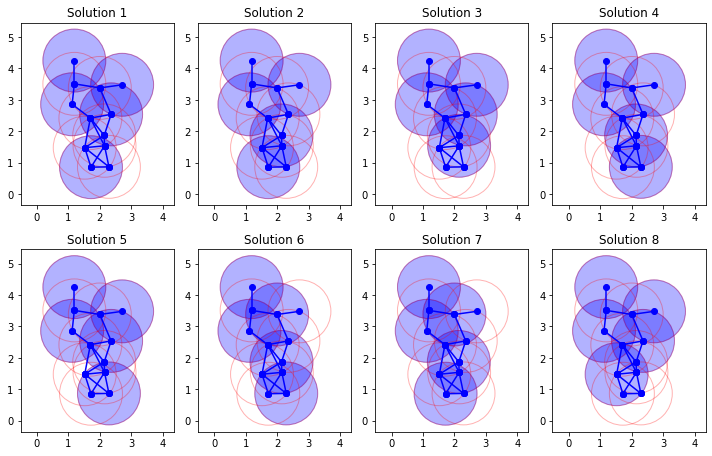

In [14]:
fig = plt.figure(figsize=(10, 12.5), tight_layout=True)

for k in range(len(gotham_bf_sol)):
    ax = fig.add_subplot(4, 4, k + 1)
    ax.set_title("Solution {}".format(k+1))
    for j in range(len(gotham_bf_sol[0])):
        if gotham_bf_sol[k][j]==1:ax.add_patch(plt.Circle(graph_gotham[j], 1., color='b', alpha=0.3))

    for i in range(len(graph_gotham)):
        ax.add_patch(plt.Circle(graph_gotham[i], 1., color='r', alpha=0.3, fill=False))        
        
    for edg in edg_gothan:
        x1, y1 = [graph_gotham[edg[0]][0], graph_gotham[edg[1]][0]], [graph_gotham[edg[0]][1], graph_gotham[edg[1]][1]]
        ax.plot(x1, y1, marker = 'o',color='b')
    ax.set_aspect('equal', adjustable='datalim')
    #ax.plot()
plt.show()
fig.savefig('wayne_solutions.png', dpi=500)

In [15]:
#  Plot for a selected solution
#sol_number=7
#fig, ax = plt.subplots( figsize=(7,9))
#for j in range(len(gotham_bf_sol[0])):
#    if gotham_bf_sol[sol_number][j]==1:ax.add_patch(plt.Circle(graph_gotham[j], 1., color='b', alpha=0.3))
#for i in range(len(graph_gotham)):
#    ax.add_patch(plt.Circle(graph_gotham[i], 1., color='r', alpha=0.3, fill=False))        
#for edg in edg_gothan:
#    x1, y1 = [graph_gotham[edg[0]][0], graph_gotham[edg[1]][0]], [graph_gotham[edg[0]][1], graph_gotham[edg[1]][1]]
#    ax.plot(x1, y1, marker = 'o',color='b')
#ax.set_aspect('equal', adjustable='datalim')
#ax.plot()   
#plt.show()
#fig.savefig('plotcircles2.png')

### Solving UD-MIS problem using Exact Diagonalization  (Quantum Brute Force)

In [16]:
# Hamiltonian
def diagonalization_sol(graph):
    edges=get_edges(graph)
    N=len(graph)
    #
    sz = sigmaz()
    Id=tensor([qeye(2)]*N)

    # List of n_i operators
    n_list = []
    for k in range(N):
        op_list = []
        for m in range(N):
            op_list.append(qeye(2))
        op_list[k] = sz
        n_list.append(0.5*(Id-tensor(op_list)))

    # Building the Hamiltonian
    H = 0
    for i in range(N):
        H+=-n_list[i]

    for ed in edges:
        H += 1.35*n_list[ed[0]]*n_list[ed[1]]
    
    # Calculation of eigenvalues and vectors 
    fund=H.eigenstates()
    for k in range(9):          # Only print the lowest 6 configurations
        sol=[]
        for i in range(len(graph)):
            sol.append(int(expect(n_list[i],fund[1][k])))
        print(sol, '{0:6.2f}'.format(fund[0][k]))    

### Solving  Problem 1-2 Q-Brute Force

In [17]:
# Solutions of 1-2 Problem
diagonalization_sol(graph) # The solutions are the configurations with energy -3.0

[0, 0, 1, 0, 1, 1]  -3.00
[0, 0, 1, 1, 1, 0]  -3.00
[1, 0, 1, 0, 1, 0]  -3.00
[0, 0, 1, 1, 1, 1]  -2.65
[1, 0, 1, 0, 1, 1]  -2.65
[1, 0, 1, 1, 1, 0]  -2.65
[0, 0, 0, 1, 1, 0]  -2.00
[0, 0, 1, 0, 0, 1]  -2.00
[0, 0, 1, 0, 1, 0]  -2.00


### Solving  Bruce's Wayne Problem Q-Brute Force

In [18]:
# Solutions of Bruce Wayne's Problem
diagonalization_sol(graph_gotham) # The solutions are the configurations with energy -5.0

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]  -5.00
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]  -5.00
[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]  -5.00
[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]  -5.00
[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]  -5.00
[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]  -5.00
[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]  -5.00
[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]  -5.00
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]  -4.65


# Studing the UD-MIS Quantumm Annealing problem

In [19]:
def Ω(t):
    aux=0.
    if (0. <= t <= 0.25):
        aux = (Ω_max / 0.25) * t
    elif (0.25 < t <= 0.69):
        aux = Ω_max
    elif (0.69 < t <= 1):
        aux = - (Ω_max * t / 0.31) + Ω_max * (1 + 0.69/0.31)
    return aux

In [20]:
def Ω2(t):
    aux=-8.*(t-0.5)**2+2.
    return aux

In [21]:
def δ(t):
    aux=0.
    slope = (δ_0 - δ_max)/(0.25 - 0.69)
    if 0 <= t <= 0.25:
        aux= δ_0
    elif 0.25 < t <= 0.69:
        aux= t * slope + (δ_max - slope * 0.69)
    elif 0.69 < t <= 1:
        aux= δ_max
    return aux

In [22]:
def δ2(t):
    aux=2./(1. + np.exp(-10.*(t-0.5)))-1
    return aux

In [23]:
# Input Data
u = 1.35
Ω_max = 1.89
δ_0 = -1.0
δ_max = 1.0
dt = 0.001

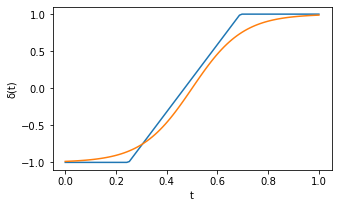

In [24]:
t=np.linspace(0.,1.,100)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(t, [δ(ti) for ti in t],label="Original")
ax.plot(t, [δ2(ti) for ti in t],label="Proposal")
ax.set_xlabel('t')
ax.set_ylabel('δ(t)');

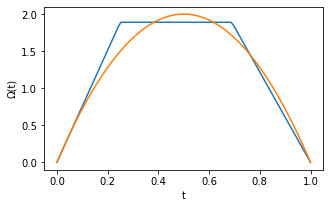

In [25]:
t=np.linspace(0.,1.,100)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(t, [Ω(ti) for ti in t])
ax.plot(t, [Ω2(ti) for ti in t])
ax.set_xlabel('t')
ax.set_ylabel('Ω(t)');